*First models for H3: Employment and Economic Stability
H3.1: Employment in stable sectors positively affects credit records, indicating consistent income.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np
from datetime import datetime
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,f1_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
!pip install pycaret
import pycaret
from pycaret.classification import setup, compare_models, plot_model, tune_model

In [ ]:
from google.colab import auth

# get credentials
auth.authenticate_user()

query = '''
SELECT *
FROM `pure-heuristic-417807.project.Credit_Final`
'''
df = pd.read_gbq(query, project_id="pure-heuristic-417807")

In [ ]:
df

,ID,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,...,BIRTHDAY,OWN_CAR,OWN_REALTY,AGE,AGE_COHORTS,CREDIT_DATE,END_STATUS,DAYS_EMPLOYED,EMPLOYED_OR_NOT,JOB_CATEGORY
0,5046487,M,3,180000.0,Secondary / secondary special,Married,Commercial associate,House / apartment,0,1,...,1981-03-21,1,0,43,Millennials,2023-06-08,Bad Status,878.0,1,Manual and Labor Intensive
1,5042016,M,0,180000.0,Secondary / secondary special,Married,Working,House / apartment,0,1,...,1995-12-09,1,0,29,Millennials,2023-04-08,Bad Status,126.0,1,Manual and Labor Intensive
2,5042021,M,0,180000.0,Secondary / secondary special,Married,Working,House / apartment,0,1,...,1995-12-09,1,0,29,Millennials,2023-04-08,Bad Status,126.0,1,Manual and Labor Intensive
3,5042018,M,0,180000.0,Secondary / secondary special,Married,Working,House / apartment,0,1,...,1995-12-09,1,0,29,Millennials,2023-04-08,Bad Status,126.0,1,Manual and Labor Intensive
4,5042019,M,0,180000.0,Secondary / secondary special,Married,Working,House / apartment,0,1,...,1995-12-09,1,0,29,Millennials,2021-01-08,Bad Status,126.0,1,Manual and Labor Intensive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5137462,F,0,135000.0,Secondary / secondary special,Married,Working,House / apartment,0,0,...,1981-11-29,0,0,43,Millennials,2021-10-08,Good Status,869.0,1,Service and Hospitality
36453,5137467,F,0,135000.0,Secondary / secondary special,Married,Working,House / apartment,0,0,...,1981-11-29,0,0,43,Millennials,2024-03-08,Good Status,869.0,1,Service and Hospitality
36454,5137465,F,0,135000.0,Secondary / secondary special,Married,Working,House / apartment,0,0,...,1981-11-29,0,0,43,Millennials,2024-05-08,Good Status,869.0,1,Service and Hospitality
36455,5137463,F,0,135000.0,Secondary / secondary special,Married,Working,House / apartment,0,0,...,1981-11-29,0,0,43,Millennials,2021-03-08,Good Status,869.0,1,Service and Hospitality


In [ ]:
df.describe()

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,OWN_CAR,OWN_REALTY,AGE,DAYS_EMPLOYED,EMPLOYED_OR_NOT
count,36457.0,36457.0,3.645700e+04,36457.0,36457.0,36457.0,36457.000000,36457.0,36457.0,36457.0,36457.000000,36457.0
mean,5078226.996544,0.430315,1.866857e+05,0.225526,0.294813,0.089722,2.198453,0.379708,0.672189,43.901116,2261.780421,0.83172
std,41875.240788,0.742367,1.017892e+05,0.417934,0.455965,0.285787,0.911686,0.485321,0.469422,11.500423,2312.988110,0.37412
min,5008804.0,0.0,2.700000e+04,0.0,0.0,0.0,1.000000,0.0,0.0,21.0,17.000000,0.0
25%,5042028.0,0.0,1.215000e+05,0.0,0.0,0.0,2.000000,0.0,0.0,34.0,408.000000,1.0
50%,5074614.0,0.0,1.575000e+05,0.0,0.0,0.0,2.000000,0.0,1.0,43.0,1552.000000,1.0
75%,5115396.0,1.0,2.250000e+05,0.0,1.0,0.0,3.000000,1.0,1.0,53.0,3153.000000,1.0
max,5150487.0,19.0,1.575000e+06,1.0,1.0,1.0,20.000000,1.0,1.0,69.0,15713.000000,1.0


In [ ]:
df.head()

,ID,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,...,BIRTHDAY,OWN_CAR,OWN_REALTY,AGE,AGE_COHORTS,CREDIT_DATE,END_STATUS,DAYS_EMPLOYED,EMPLOYED_OR_NOT,JOB_CATEGORY
0,5046487,M,3,180000.0,Secondary / secondary special,Married,Commercial associate,House / apartment,0,1,...,1981-03-21,1,0,43,Millennials,2023-06-08,Bad Status,878.0,1,Manual and Labor Intensive
1,5042016,M,0,180000.0,Secondary / secondary special,Married,Working,House / apartment,0,1,...,1995-12-09,1,0,29,Millennials,2023-04-08,Bad Status,126.0,1,Manual and Labor Intensive
2,5042021,M,0,180000.0,Secondary / secondary special,Married,Working,House / apartment,0,1,...,1995-12-09,1,0,29,Millennials,2023-04-08,Bad Status,126.0,1,Manual and Labor Intensive
3,5042018,M,0,180000.0,Secondary / secondary special,Married,Working,House / apartment,0,1,...,1995-12-09,1,0,29,Millennials,2023-04-08,Bad Status,126.0,1,Manual and Labor Intensive
4,5042019,M,0,180000.0,Secondary / secondary special,Married,Working,House / apartment,0,1,...,1995-12-09,1,0,29,Millennials,2021-01-08,Bad Status,126.0,1,Manual and Labor Intensive


In [ ]:
df["OCCUPATION_TYPE"].unique()

array(['Drivers', 'HR staff', 'IT staff', 'Laborers', 'Managers',
       'Pensioner', 'Core staff', 'Accountants', 'Sales staff',
       'Secretaries', 'Cooking staff', 'Not Specified', 'Realty agents',
       'Cleaning staff', 'Medicine staff', 'Security staff',
       'Low-skill Laborers', 'Waiters/barmen staff',
       'High skill tech staff', 'Private service staff'], dtype=object)

In [ ]:
mapping = {'Good Status': 1, 'Bad Status': 0}

# Applying the mapping to the 'status' column only
df['END_STATUS'] = df['END_STATUS'].map(mapping)


In [ ]:
df_new = df

In [ ]:
lst = list(df_new.select_dtypes('object').columns)

for i in lst :

  lb = LabelEncoder()

  df_new[i] = lb.fit_transform(df_new[i])

In [ ]:
df_new.head(5)

,ID,CODE_GENDER,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_INCOME_TYPE,NAME_HOUSING_TYPE,FLAG_WORK_PHONE,FLAG_PHONE,...,BIRTHDAY,OWN_CAR,OWN_REALTY,AGE,AGE_COHORTS,CREDIT_DATE,END_STATUS,DAYS_EMPLOYED,EMPLOYED_OR_NOT,JOB_CATEGORY
0,5046487,1,3,180000.0,4,1,0,1,0,1,...,1981-03-21,1,0,43,3,2023-06-08,0,878.0,1,2
1,5042016,1,0,180000.0,4,1,4,1,0,1,...,1995-12-09,1,0,29,3,2023-04-08,0,126.0,1,2
2,5042021,1,0,180000.0,4,1,4,1,0,1,...,1995-12-09,1,0,29,3,2023-04-08,0,126.0,1,2
3,5042018,1,0,180000.0,4,1,4,1,0,1,...,1995-12-09,1,0,29,3,2023-04-08,0,126.0,1,2
4,5042019,1,0,180000.0,4,1,4,1,0,1,...,1995-12-09,1,0,29,3,2021-01-08,0,126.0,1,2


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36457 entries, 0 to 36456
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  Int64  
 1   CODE_GENDER          36457 non-null  int64  
 2   CNT_CHILDREN         36457 non-null  Int64  
 3   AMT_INCOME_TOTAL     36457 non-null  float64
 4   NAME_EDUCATION_TYPE  36457 non-null  int64  
 5   NAME_FAMILY_STATUS   36457 non-null  int64  
 6   NAME_INCOME_TYPE     36457 non-null  int64  
 7   NAME_HOUSING_TYPE    36457 non-null  int64  
 8   FLAG_WORK_PHONE      36457 non-null  Int64  
 9   FLAG_PHONE           36457 non-null  Int64  
 10  FLAG_EMAIL           36457 non-null  Int64  
 11  OCCUPATION_TYPE      36457 non-null  int64  
 12  CNT_FAM_MEMBERS      36457 non-null  float64
 13  BIRTHDAY             36457 non-null  dbdate 
 14  OWN_CAR              36457 non-null  Int64  
 15  OWN_REALTY           36457 non-null 

In [ ]:
X = df_new[["NAME_HOUSING_TYPE", "DAYS_EMPLOYED", "NAME_INCOME_TYPE", "OCCUPATION_TYPE"]]
y = df_new["END_STATUS"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
log_model = LogisticRegression()
log_model.fit(X, y)

LogisticRegression()

In [ ]:
log_model.score(X_test, y_test)

0.522078990674712

In [ ]:
log_model_cv = LogisticRegression()

X = df_new[["NAME_HOUSING_TYPE", "DAYS_EMPLOYED", "NAME_INCOME_TYPE", "OCCUPATION_TYPE"]]
y = df_new["END_STATUS"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale
scaler = StandardScaler()    # same as before
model = LogisticRegression()   # put scaler and model together in one pipeline
pipeline = make_pipeline(scaler, model)
pipeline

# Train - in one go
pipeline.fit(X_train, y_train)
# This does it all for me:
#   - It fits the scaler
#   - It transforms the train data
#   - It fits the model on the transformed train data

# Score - in one go
pipeline.score(X_test, y_test)
# This does it all for me:
#   - It does NOT fit the scaler again (we don't want that)
#   - It transforms the test data
#   - It scores the model on the transformed test data

cv_score = cross_val_score(pipeline, X, y, cv=5)

print("The CV scores: ", cv_score)
print("Mean of the scores: ", cv_score.mean())

The CV scores:  [0.51892485 0.51892485 0.49197641 0.51899602 0.53216294]
Mean of the scores:  0.5161970141352819


In [ ]:
set_up = setup(data = df_new, train_size = 0.8, target = "END_STATUS", normalize = True, ignore_features=["ID","BIRTHDAY",'CREDIT_DATE', 'JOB_CATEGORY', 'AGE_COHORTS'])

,Description,Value
0,Session id,6287
1,Target,END_STATUS
2,Target type,Binary
3,Original data shape,"(36457, 23)"
4,Transformed data shape,"(36457, 18)"
5,Transformed train set shape,"(29165, 18)"
6,Transformed test set shape,"(7292, 18)"
7,Ignore features,5
8,Numeric features,17
9,Preprocess,True


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6448,0.7087,0.6758,0.6523,0.6638,0.2875,0.2877,4.4610
dt,Decision Tree Classifier,0.6420,0.6867,0.6172,0.6678,0.6414,0.2850,0.2860,0.6440
et,Extra Trees Classifier,0.6411,0.6999,0.6248,0.6638,0.6437,0.2828,0.2833,3.5600
knn,K Neighbors Classifier,0.6187,0.6577,0.6467,0.6290,0.6377,0.2354,0.2355,2.2380
xgboost,Extreme Gradient Boosting,0.6122,0.6594,0.6613,0.6182,0.6389,0.2212,0.2219,0.5000
lightgbm,Light Gradient Boosting Machine,0.5948,0.6356,0.6977,0.5932,0.6412,0.1828,0.1861,2.7630
gbc,Gradient Boosting Classifier,0.5472,0.5694,0.7247,0.5483,0.6242,0.0814,0.0865,2.7610
ada,Ada Boost Classifier,0.5365,0.5448,0.6992,0.5414,0.6102,0.0609,0.0640,1.0780
qda,Quadratic Discriminant Analysis,0.5236,0.5285,0.6660,0.5328,0.5919,0.0364,0.0377,0.1280
dummy,Dummy Classifier,0.5189,0.5000,1.0000,0.5189,0.6833,0.0000,0.0000,0.1040


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

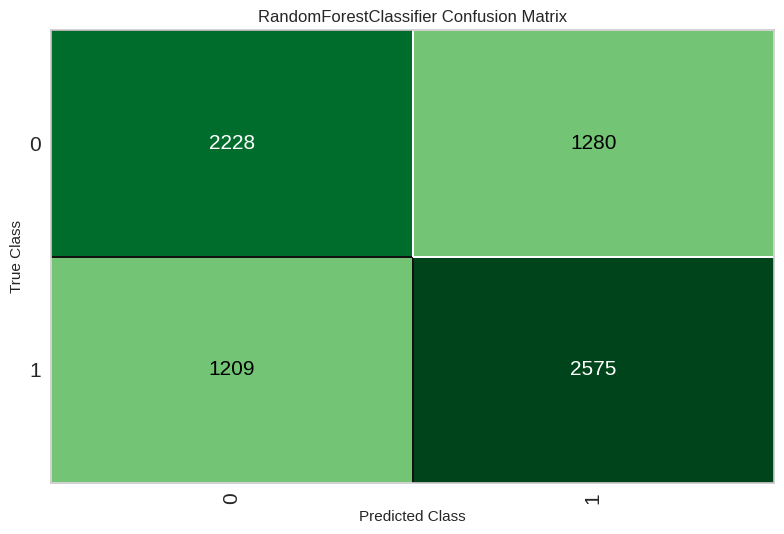

In [ ]:
plot_model(best_model, plot='confusion_matrix')

In [ ]:
best_model_tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6263,0.6680,0.7153,0.6217,0.6652,0.2471,0.2502
1,0.6147,0.6590,0.6902,0.6147,0.6503,0.2245,0.2263
2,0.6075,0.6581,0.6737,0.6104,0.6405,0.2106,0.2118
3,0.6147,0.6711,0.7338,0.6064,0.6641,0.2218,0.2273
4,0.5986,0.6469,0.7173,0.5938,0.6497,0.1893,0.1940
5,0.6063,0.6644,0.6728,0.6092,0.6394,0.2083,0.2095
6,0.6135,0.6556,0.6913,0.6131,0.6499,0.2220,0.2240
7,0.6125,0.6621,0.6880,0.6127,0.6482,0.2201,0.2219
8,0.6135,0.6646,0.6794,0.6156,0.6459,0.2228,0.2241


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


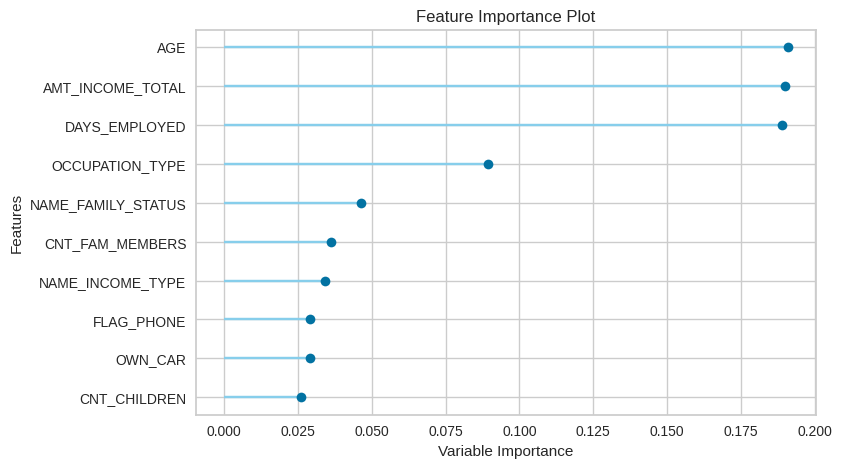

In [ ]:
plot_model(best_model_tuned,'feature')

In [ ]:
df_H3 = df_new[["NAME_HOUSING_TYPE", "DAYS_EMPLOYED", "NAME_INCOME_TYPE", "OCCUPATION_TYPE", "END_STATUS"]]
df_H3

,NAME_HOUSING_TYPE,DAYS_EMPLOYED,NAME_INCOME_TYPE,OCCUPATION_TYPE,END_STATUS
0,1,878.0,0,4,0
1,1,126.0,4,4,0
2,1,126.0,4,4,0
3,1,126.0,4,4,0
4,1,126.0,4,4,0
...,...,...,...,...,...
36452,1,869.0,4,14,1
36453,1,869.0,4,14,1
36454,1,869.0,4,14,1
36455,1,869.0,4,14,1


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

set_up = setup(data = df_H3, train_size = 0.8, target = "END_STATUS", normalize = True)

,Description,Value
0,Session id,2304
1,Target,END_STATUS
2,Target type,Binary
3,Original data shape,"(36457, 5)"
4,Transformed data shape,"(36457, 5)"
5,Transformed train set shape,"(29165, 5)"
6,Transformed test set shape,"(7292, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6217,0.6751,0.7221,0.6155,0.6645,0.2371,0.2411,3.0850
et,Extra Trees Classifier,0.6196,0.6721,0.6788,0.6224,0.6493,0.2353,0.2364,1.8600
dt,Decision Tree Classifier,0.6181,0.6657,0.6730,0.6221,0.6465,0.2326,0.2335,0.0960
knn,K Neighbors Classifier,0.6020,0.6340,0.6792,0.6050,0.6374,0.1990,0.2027,0.3200
xgboost,Extreme Gradient Boosting,0.5801,0.6156,0.7197,0.5765,0.6400,0.1507,0.1563,0.2260
lightgbm,Light Gradient Boosting Machine,0.5646,0.5933,0.7552,0.5597,0.6429,0.1157,0.1245,3.5540
gbc,Gradient Boosting Classifier,0.5445,0.5585,0.7944,0.5417,0.6441,0.0706,0.0813,1.4430
ada,Ada Boost Classifier,0.5277,0.5349,0.7629,0.5312,0.6262,0.0374,0.0424,0.7630
ridge,Ridge Classifier,0.5225,0.5124,0.9652,0.5216,0.6772,0.0104,0.0263,0.0500
lda,Linear Discriminant Analysis,0.5225,0.5124,0.9651,0.5216,0.6771,0.0104,0.0264,0.0540


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

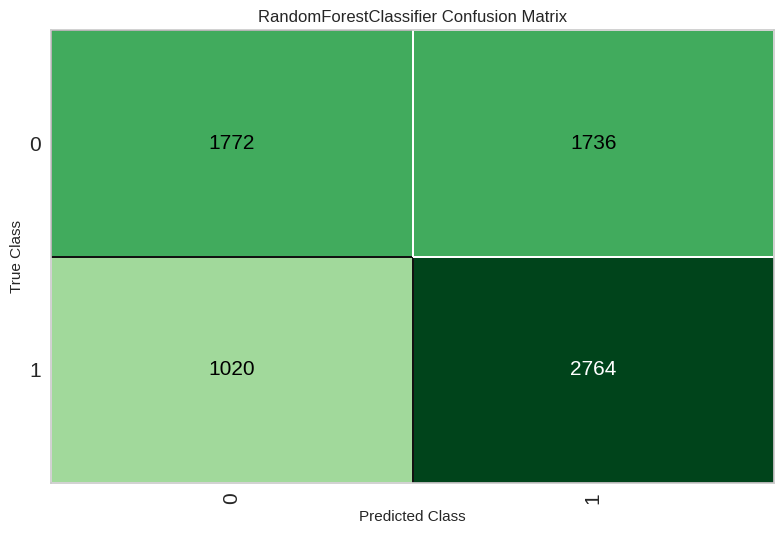

In [ ]:
plot_model(best_model, plot='confusion_matrix')

In [ ]:
best_model_tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.4988,0.5118,0.4683,0.5190,0.4924,0.0000,0.0000
1,0.5207,0.5304,0.4901,0.5424,0.5149,0.0437,0.0440
2,0.5108,0.5277,0.4590,0.5334,0.4934,0.0256,0.0258
3,0.5297,0.5397,0.4828,0.5538,0.5159,0.0627,0.0633
4,0.5057,0.5155,0.4452,0.5282,0.4832,0.0160,0.0162
5,0.5189,0.5349,0.4137,0.5482,0.4716,0.0455,0.0470
6,0.5243,0.5384,0.4944,0.5460,0.5189,0.0509,0.0511
7,0.5463,0.5542,0.4838,0.5746,0.5253,0.0969,0.0982
8,0.5329,0.5351,0.4845,0.5574,0.5184,0.0693,0.0699


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


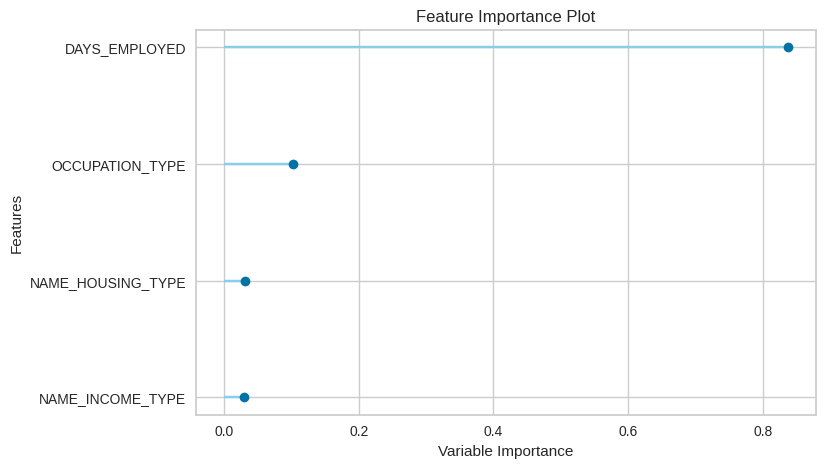

In [ ]:
plot_model(best_model_tuned,'feature')

In [ ]:
df_H3.corr()

,NAME_HOUSING_TYPE,DAYS_EMPLOYED,NAME_INCOME_TYPE,OCCUPATION_TYPE,END_STATUS
NAME_HOUSING_TYPE,1.000000,-0.028724,0.035694,-0.055226,-0.000163
DAYS_EMPLOYED,-0.028724,1.000000,0.176011,-0.167165,0.011897
NAME_INCOME_TYPE,0.035694,0.176011,1.000000,-0.142381,0.003215
OCCUPATION_TYPE,-0.055226,-0.167165,-0.142381,1.000000,-0.024707
END_STATUS,-0.000163,0.011897,0.003215,-0.024707,1.000000


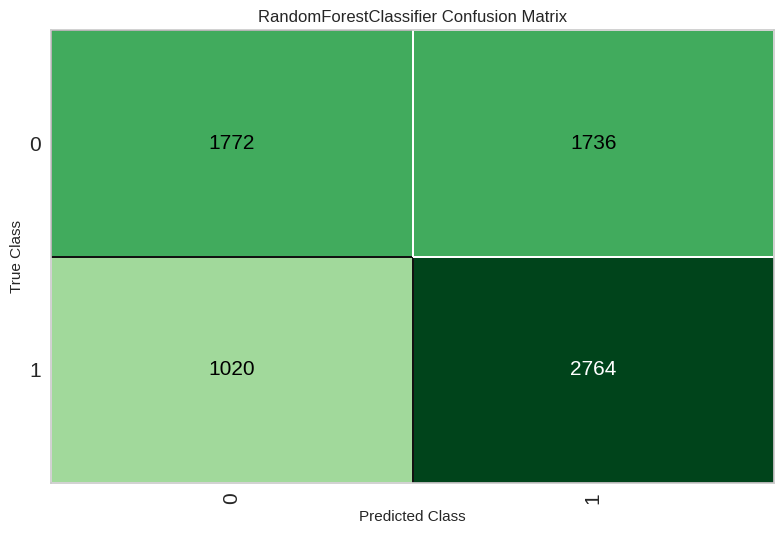

In [ ]:
plot_model(best_model, plot='confusion_matrix')

Text(0.5, 1.0, 'Correlation Heatmap')

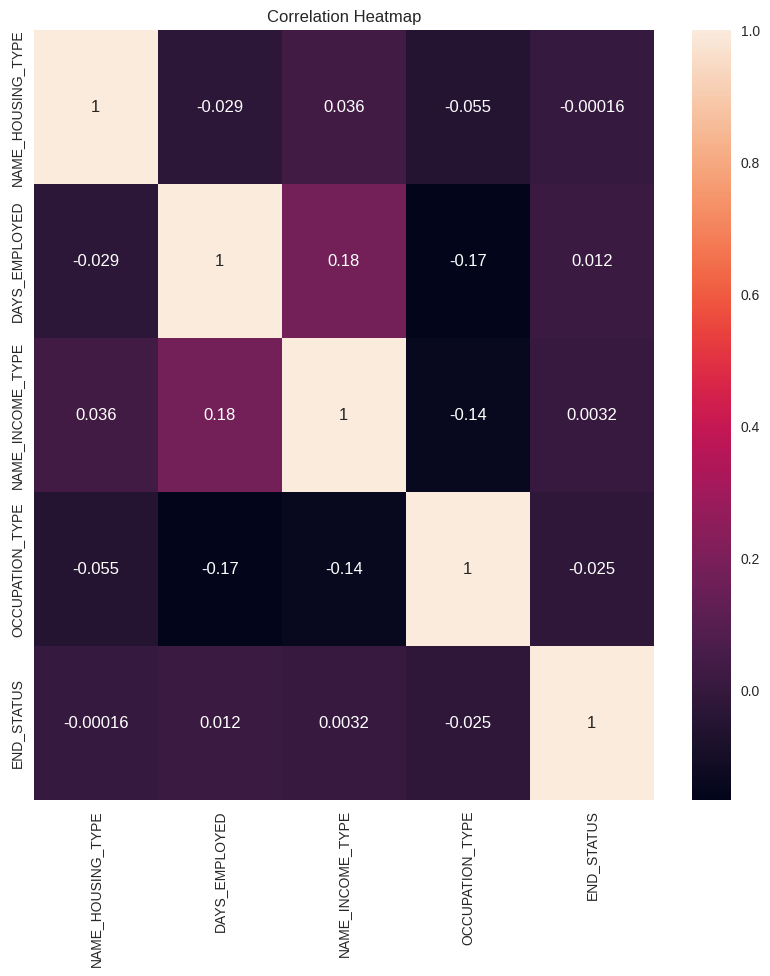

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_H3.select_dtypes(include =['float64', 'int64']).corr(), annot = True)
plt.title('Correlation Heatmap')

In [ ]:
df_H4 = df_new[["AGE", "DAYS_EMPLOYED", "AMT_INCOME_TOTAL", "OCCUPATION_TYPE", "NAME_FAMILY_STATUS", "END_STATUS"]]
df_H4

,AGE,DAYS_EMPLOYED,AMT_INCOME_TOTAL,OCCUPATION_TYPE,NAME_FAMILY_STATUS,END_STATUS
0,43,878.0,180000.0,4,1,0
1,29,126.0,180000.0,4,1,0
2,29,126.0,180000.0,4,1,0
3,29,126.0,180000.0,4,1,0
4,29,126.0,180000.0,4,1,0
...,...,...,...,...,...,...
36452,43,869.0,135000.0,14,1,1
36453,43,869.0,135000.0,14,1,1
36454,43,869.0,135000.0,14,1,1
36455,43,869.0,135000.0,14,1,1


In [ ]:
set_up = setup(data = df_H4, train_size = 0.8, target = "END_STATUS", normalize = True)

,Description,Value
0,Session id,3166
1,Target,END_STATUS
2,Target type,Binary
3,Original data shape,"(36457, 6)"
4,Transformed data shape,"(36457, 6)"
5,Transformed train set shape,"(29165, 6)"
6,Transformed test set shape,"(7292, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.6439,0.6964,0.6276,0.6668,0.6466,0.2884,0.2890,2.5880
dt,Decision Tree Classifier,0.6415,0.6823,0.6178,0.6670,0.6414,0.2839,0.2848,0.2290
rf,Random Forest Classifier,0.6414,0.7016,0.6717,0.6495,0.6603,0.2808,0.2810,4.2800
knn,K Neighbors Classifier,0.6147,0.6583,0.6452,0.6248,0.6347,0.2274,0.2276,0.6670
xgboost,Extreme Gradient Boosting,0.6075,0.6484,0.6726,0.6107,0.6401,0.2107,0.2120,0.4280
lightgbm,Light Gradient Boosting Machine,0.5869,0.6244,0.7226,0.5821,0.6447,0.1646,0.1703,1.8050
gbc,Gradient Boosting Classifier,0.5490,0.5680,0.7535,0.5476,0.6342,0.0832,0.0908,2.2230
ada,Ada Boost Classifier,0.5378,0.5448,0.7362,0.5401,0.6231,0.0608,0.0659,0.5690
ridge,Ridge Classifier,0.5210,0.5138,0.9075,0.5221,0.6628,0.0118,0.0201,0.0760
lda,Linear Discriminant Analysis,0.5210,0.5138,0.9075,0.5221,0.6628,0.0119,0.0202,0.1030


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

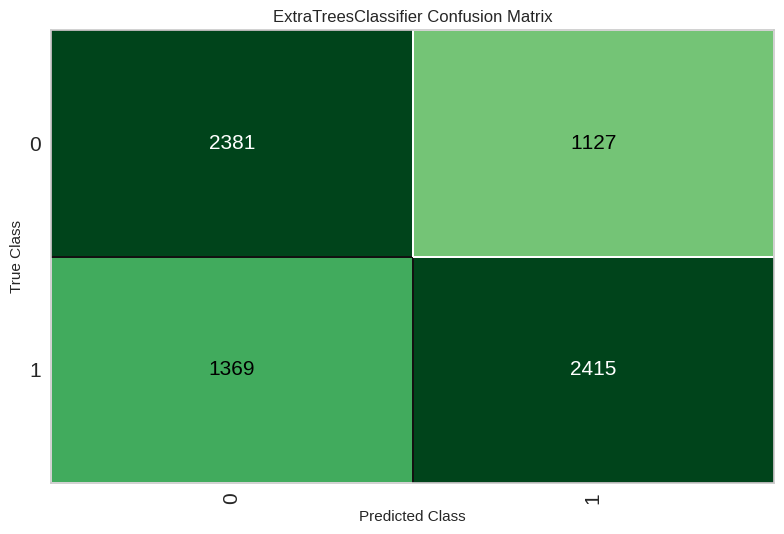

In [ ]:
plot_model(best_model, plot='confusion_matrix')

In [ ]:
best_model_tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5190,0.5229,0.5376,0.5366,0.5371,0.0366,0.0366
1,0.5245,0.5341,0.5343,0.5426,0.5384,0.0482,0.0482
2,0.5249,0.5364,0.5489,0.5417,0.5453,0.0478,0.0478
3,0.5262,0.5371,0.5535,0.5427,0.5481,0.0503,0.0503
4,0.5108,0.5265,0.5363,0.5283,0.5323,0.0196,0.0196
5,0.5295,0.5449,0.5486,0.5464,0.5475,0.0575,0.0575
6,0.5316,0.5534,0.5545,0.5480,0.5512,0.0613,0.0613
7,0.5298,0.5425,0.5512,0.5465,0.5489,0.0580,0.0580
8,0.5202,0.5342,0.5486,0.5369,0.5427,0.0383,0.0383


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


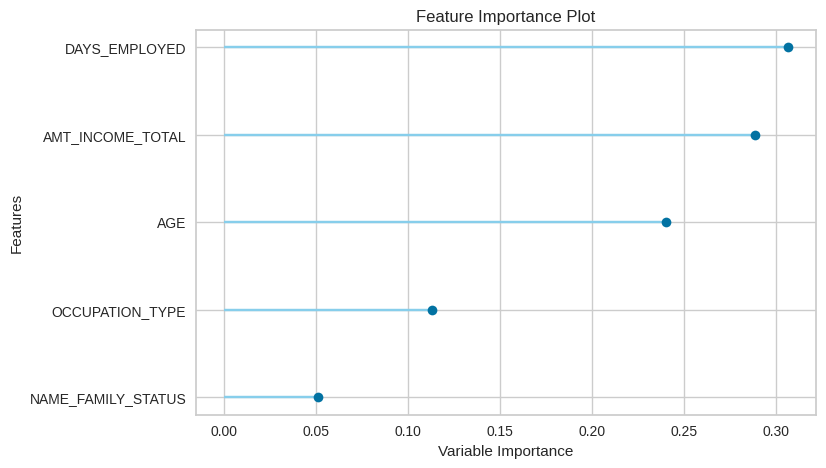

In [ ]:
plot_model(best_model_tuned,'feature')

Text(0.5, 1.0, 'Correlation Heatmap')

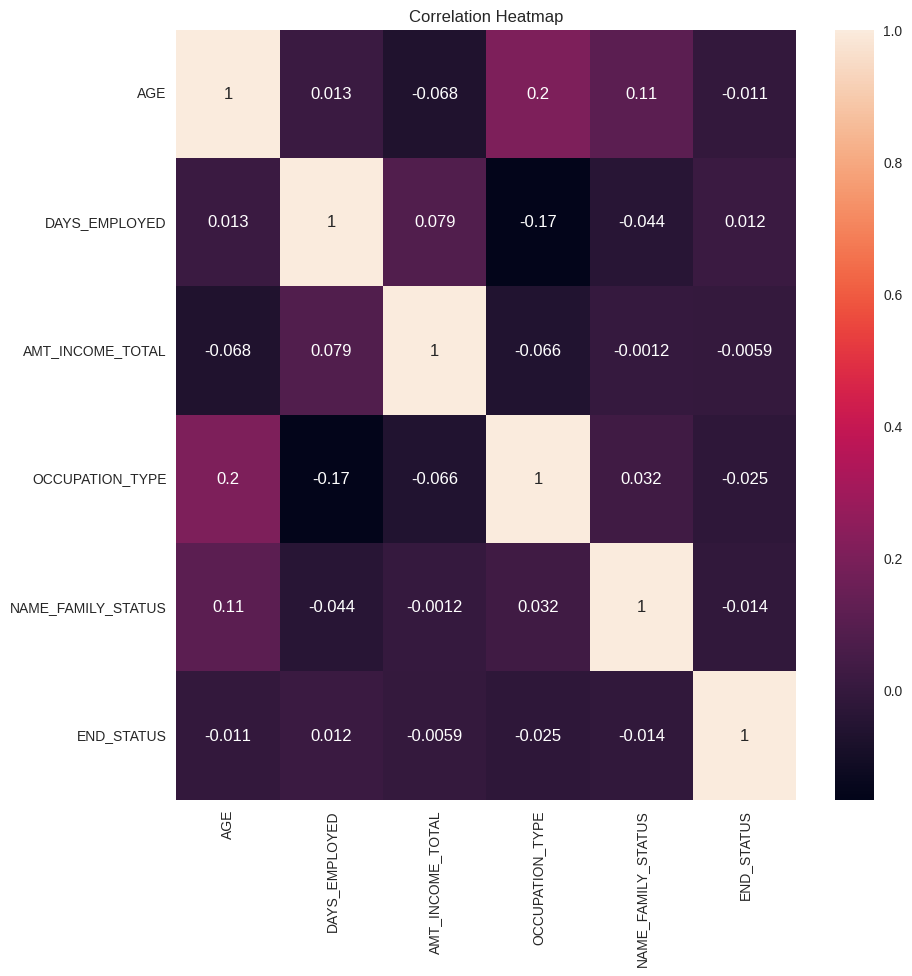

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_H4.select_dtypes(include =['float64', 'int64']).corr(), annot = True)
plt.title('Correlation Heatmap')

In [ ]:
df_H5 = df_new[["AGE", "CODE_GENDER", "CNT_CHILDREN", "CNT_FAM_MEMBERS", "NAME_FAMILY_STATUS", "END_STATUS"]]
df_H5


,AGE,CODE_GENDER,CNT_CHILDREN,CNT_FAM_MEMBERS,NAME_FAMILY_STATUS,END_STATUS
0,43,1,3,5.0,1,0
1,29,1,0,2.0,1,0
2,29,1,0,2.0,1,0
3,29,1,0,2.0,1,0
4,29,1,0,2.0,1,0
...,...,...,...,...,...,...
36452,43,0,0,2.0,1,1
36453,43,0,0,2.0,1,1
36454,43,0,0,2.0,1,1
36455,43,0,0,2.0,1,1


In [ ]:
set_up = setup(data = df_H5, train_size = 0.8, target = "END_STATUS", normalize = True)

,Description,Value
0,Session id,6485
1,Target,END_STATUS
2,Target type,Binary
3,Original data shape,"(36457, 6)"
4,Transformed data shape,"(36457, 6)"
5,Transformed train set shape,"(29165, 6)"
6,Transformed test set shape,"(7292, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [ ]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.5461,0.5560,0.7134,0.5482,0.6198,0.0799,0.0844,1.4850
et,Extra Trees Classifier,0.5455,0.5623,0.6276,0.5549,0.5889,0.0849,0.0858,1.2740
dt,Decision Tree Classifier,0.5454,0.5620,0.6276,0.5548,0.5889,0.0848,0.0856,0.1340
xgboost,Extreme Gradient Boosting,0.5435,0.5578,0.6840,0.5483,0.6084,0.0767,0.0796,0.2320
rf,Random Forest Classifier,0.5432,0.5614,0.6406,0.5516,0.5927,0.0793,0.0804,2.1540
gbc,Gradient Boosting Classifier,0.5370,0.5406,0.8069,0.5358,0.6439,0.0539,0.0644,1.2970
ada,Ada Boost Classifier,0.5282,0.5296,0.7660,0.5315,0.6273,0.0383,0.0436,0.4660
knn,K Neighbors Classifier,0.5226,0.5297,0.5739,0.5376,0.5547,0.0414,0.0415,0.6400
dummy,Dummy Classifier,0.5189,0.5000,1.0000,0.5189,0.6833,0.0000,0.0000,0.0560
lr,Logistic Regression,0.5187,0.5061,0.9545,0.5197,0.6730,0.0031,0.0076,0.1880


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

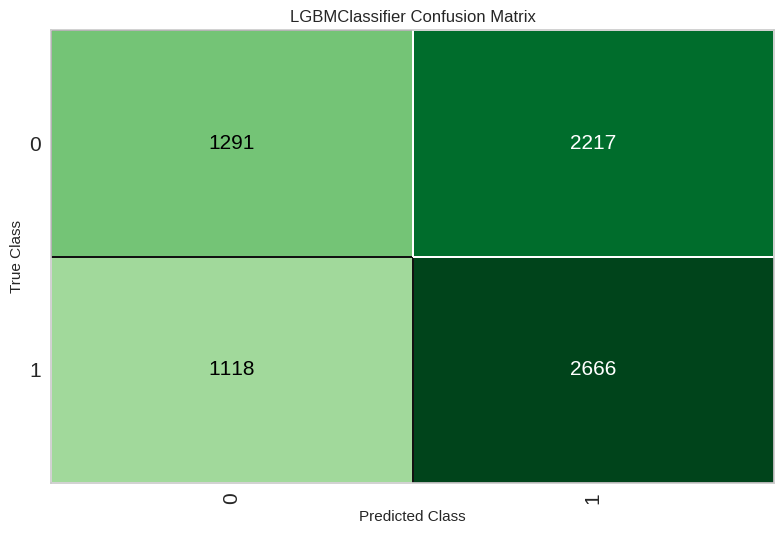

In [ ]:
plot_model(best_model, plot='confusion_matrix')

In [ ]:
best_model_tuned = tune_model(best_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.5495,0.5542,0.7682,0.5470,0.6390,0.0831,0.0919
1,0.5406,0.5545,0.7391,0.5422,0.6255,0.0665,0.0720
2,0.5310,0.5412,0.7530,0.5342,0.6250,0.0452,0.0502
3,0.5334,0.5331,0.7166,0.5379,0.6146,0.0531,0.0566
4,0.5444,0.5458,0.7332,0.5455,0.6255,0.0749,0.0803
5,0.5285,0.5350,0.7052,0.5346,0.6082,0.0436,0.0463
6,0.5364,0.5351,0.7356,0.5390,0.6221,0.0579,0.0627
7,0.5312,0.5377,0.7032,0.5368,0.6089,0.0495,0.0524
8,0.5442,0.5561,0.6980,0.5477,0.6138,0.0773,0.0807


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


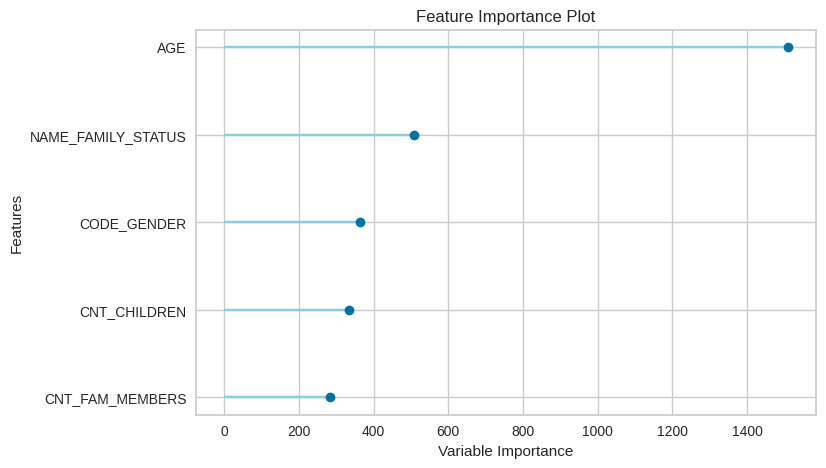

In [ ]:
plot_model(best_model_tuned,'feature')

Text(0.5, 1.0, 'Correlation Heatmap')

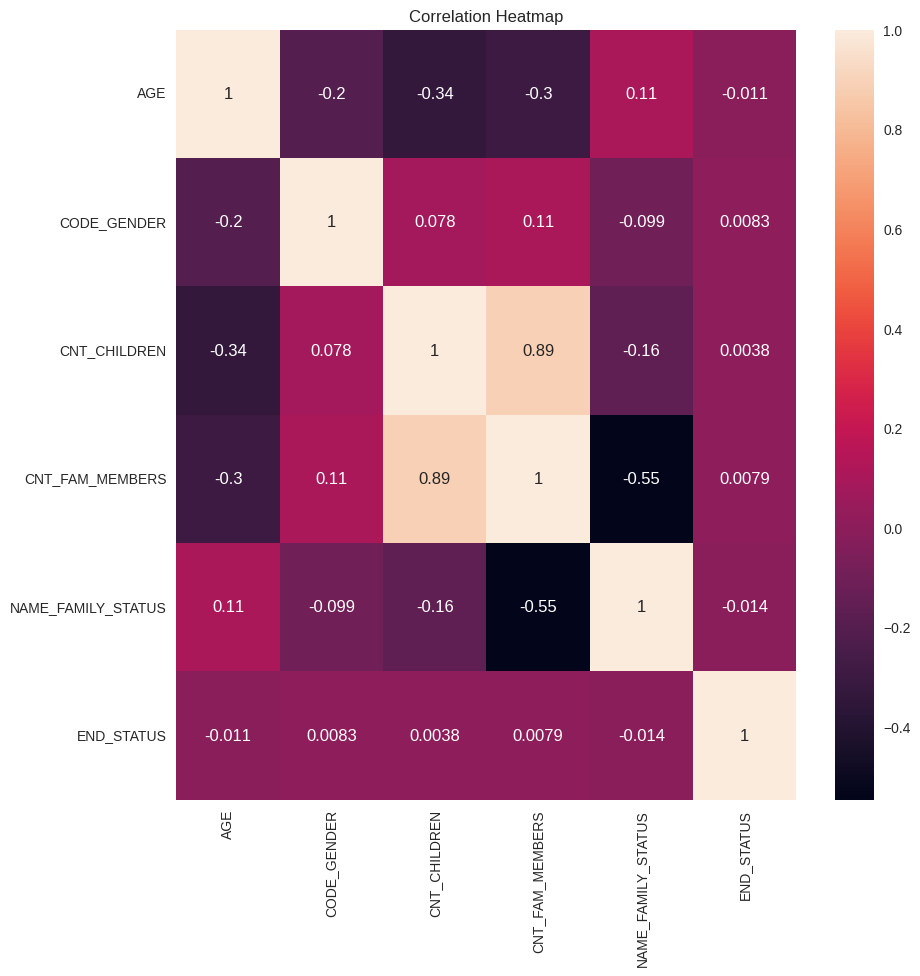

In [ ]:
plt.figure(figsize = (10, 10))
sns.heatmap(df_H5.select_dtypes(include =['float64', 'int64']).corr(), annot = True)
plt.title('Correlation Heatmap')